In [120]:
import kagglehub

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import networkx as nx

In [121]:
ais_data = pd.read_csv('obc_tanker_cargo.csv')

In [122]:
ais_data

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,...,SHIP_AND_CARGO_TYPE,DRAUGHT,DRAUGHT.1,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD,DESTINATION,MMSI_COUNTRY_CD,RECEIVER
0,1,323150000,LPG EMILIA,9242209.0,CLBS,22.779250,-78.741867,2023-04-01 00:00:00.000,14.7,110.0,...,80,8.4,8.4,143,35,14,14,FOR ORDERS,CU,NaN
1,1,334976000,BELEN,9196230.0,HQZX5,23.218183,-78.842584,2023-04-01 00:00:00.000,10.2,323.4,...,70,3.6,3.6,80,10,5,9,USMIA,HN,NaN
2,1,319103800,STOLT SINCERITY,9680085.0,ZGEY,22.423079,-77.790762,2023-04-01 00:00:00.000,13.7,302.6,...,80,10.5,10.5,155,30,18,14,INKAK,KY,rORBCOMM000
3,1,323150000,LPG EMILIA,9242209.0,CLBS,22.701027,-78.515972,2023-04-01 00:55:00.000,14.8,109.0,...,80,8.4,8.4,143,35,14,14,FOR ORDERS,CU,NaN
4,1,334979000,SARA REGINA,9142655.0,HQZX8,21.862225,-76.873167,2023-04-01 00:55:00.000,10.9,294.0,...,70,3.8,3.8,79,12,7,7,USMIA,HN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131303,1,677087000,HIMALAYA,8410330.0,5IM970,21.740143,-76.850582,2025-09-12 23:10:00.000,5.1,295.2,...,70,3.0,3.0,78,5,5,7,DOHAI,TZ,ORBCOMM-T
131304,1,219484000,HAFNIA LIBRA,9617959.0,OUYK2,22.592591,-78.073797,2025-09-12 23:20:00.000,13.8,303.4,...,89,7.5,7.5,150,33,20,12,SGSIN PEBGC,DK,ORBCOMM-S
131305,1,255915671,BOCHEM ROTTERDAM,9955478.0,CQ2129,22.885718,-79.046140,2025-09-12 23:25:00.000,13.8,111.1,...,80,8.2,8.2,133,26,8,19,MA SFI,PT,NaN
131306,1,338302000,MAGNOLIA STATE,9697997.0,KGNQ,21.888333,-77.188660,2025-09-12 23:45:00.000,15.2,132.3,...,80,9.5,9.5,151,35,19,13,US PEF,US,ORBCOMM-T


In [123]:
ais_data.columns

Index(['MSG_TYPE', 'MMSI', 'NAME', 'IMO_NUMBER', 'CALL_SIGN', 'LAT_AVG',
       'LON_AVG', 'PERIOD', 'SPEED_KNOTS', 'COG_DEG', 'HEADING_DEG',
       'NAV_STATUS', 'NAV_SENSOR', 'SHIP_AND_CARGO_TYPE', 'DRAUGHT',
       'DRAUGHT.1', 'DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD',
       'DESTINATION', 'MMSI_COUNTRY_CD', 'RECEIVER'],
      dtype='object')

In [124]:
new_ais = ais_data[['MMSI', 'NAME', 'LAT_AVG',
       'LON_AVG', 'PERIOD', 'SPEED_KNOTS', 'COG_DEG', 'HEADING_DEG',
       'NAV_STATUS', 'SHIP_AND_CARGO_TYPE', 'DRAUGHT', 'DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD']]
new_ais.head()

,MMSI,NAME,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,HEADING_DEG,NAV_STATUS,SHIP_AND_CARGO_TYPE,DRAUGHT,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD
0,323150000,LPG EMILIA,22.779250,-78.741867,2023-04-01 00:00:00.000,14.7,110.0,112.0,0.0,80,8.4,143,35,14,14
1,334976000,BELEN,23.218183,-78.842584,2023-04-01 00:00:00.000,10.2,323.4,322.0,0.0,70,3.6,80,10,5,9
2,319103800,STOLT SINCERITY,22.423079,-77.790762,2023-04-01 00:00:00.000,13.7,302.6,302.0,0.0,80,10.5,155,30,18,14
3,323150000,LPG EMILIA,22.701027,-78.515972,2023-04-01 00:55:00.000,14.8,109.0,110.0,0.0,80,8.4,143,35,14,14
4,334979000,SARA REGINA,21.862225,-76.873167,2023-04-01 00:55:00.000,10.9,294.0,NaN,0.0,70,3.8,79,12,7,7


In [125]:
len(ais_data)

131308

In [126]:
len(ais_data['MMSI'].unique())

3633

In [127]:
ais_vessel_types = {
1: "Reserved for future use",
2: "Reserved for future use",
3: "Reserved for future use",
4: "Reserved for future use",
5: "Reserved for future use",
6: "Reserved for future use",
7: "Reserved for future use",
8: "Reserved for future use",
9: "Reserved for future use",
10: "Reserved for future use",
11: "Reserved for future use",
12: "Reserved for future use",
13: "Reserved for future use",
14: "Reserved for future use",
15: "Reserved for future use",
16: "Reserved for future use",
17: "Reserved for future use",
18: "Reserved for future use",
19: "Reserved for future use",
20: "Wing in ground (WIG), all ships of this type",
21: "Wing in ground (WIG), Hazardous category A",
22: "Wing in ground (WIG), Hazardous category B",
23: "Wing in ground (WIG), Hazardous category C",
24: "Wing in ground (WIG), Hazardous category D",
25: "Wing in ground (WIG), Reserved for future use",
26: "Wing in ground (WIG), Reserved for future use",
27: "Wing in ground (WIG), Reserved for future use",
28: "Wing in ground (WIG), Reserved for future use",
29: "Wing in ground (WIG), Reserved for future use",
30: "Fishing",
31: "Towing",
32: "Towing: length exceeds 200m or breadth exceeds 25m",
33: "Dredging or underwater ops",
34: "Diving ops",
35: "Military ops",
36: "Sailing",
37: "Pleasure Craft",
38: "Reserved",
39: "Reserved",
40: "High speed craft (HSC), all ships of this type",
41: "High speed craft (HSC), Hazardous category A",
42: "High speed craft (HSC), Hazardous category B",
43: "High speed craft (HSC), Hazardous category C",
44: "High speed craft (HSC), Hazardous category D",
45: "High speed craft (HSC), Reserved for future use",
46: "High speed craft (HSC), Reserved for future use",
47: "High speed craft (HSC), Reserved for future use",
48: "High speed craft (HSC), Reserved for future use",
49: "High speed craft (HSC), No additional information",
50: "Pilot Vessel",
51: "Search and Rescue vessel",
52: "Tug",
53: "Port Tender",
54: "Anti-pollution equipment",
55: "Law Enforcement",
56: "Spare - Local Vessel",
57: "Spare - Local Vessel",
58: "Medical Transport",
59: "Noncombatant ship according to RR Resolution No. 18",
60: "Passenger, all ships of this type",
61: "Passenger, Hazardous category A",
62: "Passenger, Hazardous category B",
63: "Passenger, Hazardous category C",
64: "Passenger, Hazardous category D",
65: "Passenger, Reserved for future use",
66: "Passenger, Reserved for future use",
67: "Passenger, Reserved for future use",
68: "Passenger, Reserved for future use",
69: "Passenger, No additional information",
70: "Cargo, all ships of this type",
71: "Cargo, Hazardous category A",
72: "Cargo, Hazardous category B",
73: "Cargo, Hazardous category C",
74: "Cargo, Hazardous category D",
75: "Cargo, Reserved for future use",
76: "Cargo, Reserved for future use",
77: "Cargo, Reserved for future use",
78: "Cargo, Reserved for future use",
79: "Cargo, No additional information",
80: "Tanker, all ships of this type",
81: "Tanker, Hazardous category A",
82: "Tanker, Hazardous category B",
83: "Tanker, Hazardous category C",
84: "Tanker, Hazardous category D",
85: "Tanker, Reserved for future use",
86: "Tanker, Reserved for future use",
87: "Tanker, Reserved for future use",
88: "Tanker, Reserved for future use",
89: "Tanker, No additional information",
90: "Other Type, all ships of this type",
91: "Other Type, Hazardous category A",
92: "Other Type, Hazardous category B",
93: "Other Type, Hazardous category C",
94: "Other Type, Hazardous category D",
95: "Other Type, Reserved for future use",
96: "Other Type, Reserved for future use",
97: "Other Type, Reserved for future use",
98: "Other Type, Reserved for future use",
99: "Other Type, no additional information"
}


def get_vessel_type(code):
    """
    Retrieves the vessel type description from an AIS code.
    """
    return ais_vessel_types.get(code, "Unknown or Reserved Code")

In [128]:
ais_data['VesselType'] = ais_data['SHIP_AND_CARGO_TYPE'].apply(get_vessel_type)

In [129]:
ais_data.head()

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,...,DRAUGHT,DRAUGHT.1,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD,DESTINATION,MMSI_COUNTRY_CD,RECEIVER,VesselType
0,1,323150000,LPG EMILIA,9242209.0,CLBS,22.779250,-78.741867,2023-04-01 00:00:00.000,14.7,110.0,...,8.4,8.4,143,35,14,14,FOR ORDERS,CU,NaN,"Tanker, all ships of this type"
1,1,334976000,BELEN,9196230.0,HQZX5,23.218183,-78.842584,2023-04-01 00:00:00.000,10.2,323.4,...,3.6,3.6,80,10,5,9,USMIA,HN,NaN,"Cargo, all ships of this type"
2,1,319103800,STOLT SINCERITY,9680085.0,ZGEY,22.423079,-77.790762,2023-04-01 00:00:00.000,13.7,302.6,...,10.5,10.5,155,30,18,14,INKAK,KY,rORBCOMM000,"Tanker, all ships of this type"
3,1,323150000,LPG EMILIA,9242209.0,CLBS,22.701027,-78.515972,2023-04-01 00:55:00.000,14.8,109.0,...,8.4,8.4,143,35,14,14,FOR ORDERS,CU,NaN,"Tanker, all ships of this type"
4,1,334979000,SARA REGINA,9142655.0,HQZX8,21.862225,-76.873167,2023-04-01 00:55:00.000,10.9,294.0,...,3.8,3.8,79,12,7,7,USMIA,HN,NaN,"Cargo, all ships of this type"


In [130]:
new_ais['VesselType'] = new_ais['SHIP_AND_CARGO_TYPE'].apply(get_vessel_type)

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\402972485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ais['VesselType'] = new_ais['SHIP_AND_CARGO_TYPE'].apply(get_vessel_type)


In [135]:
new_ais = new_ais.drop('SHIP_AND_CARGO_TYPE', axis=1)
new_ais.head()

,MMSI,NAME,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,HEADING_DEG,NAV_STATUS,DRAUGHT,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD,VesselType
0,323150000,LPG EMILIA,22.779250,-78.741867,2023-04-01 00:00:00.000,14.7,110.0,112.0,0.0,8.4,143,35,14,14,"Tanker, all ships of this type"
1,334976000,BELEN,23.218183,-78.842584,2023-04-01 00:00:00.000,10.2,323.4,322.0,0.0,3.6,80,10,5,9,"Cargo, all ships of this type"
2,319103800,STOLT SINCERITY,22.423079,-77.790762,2023-04-01 00:00:00.000,13.7,302.6,302.0,0.0,10.5,155,30,18,14,"Tanker, all ships of this type"
3,323150000,LPG EMILIA,22.701027,-78.515972,2023-04-01 00:55:00.000,14.8,109.0,110.0,0.0,8.4,143,35,14,14,"Tanker, all ships of this type"
4,334979000,SARA REGINA,21.862225,-76.873167,2023-04-01 00:55:00.000,10.9,294.0,NaN,0.0,3.8,79,12,7,7,"Cargo, all ships of this type"


In [11]:
ais_data['VesselType'].value_counts()

VesselType
Cargo, all ships of this type        63595
Tanker, all ships of this type       27607
Cargo, No additional information     17685
Cargo, Hazardous category A           6084
Tanker, No additional information     4510
Cargo, Hazardous category D           3251
Tanker, Hazardous category D          2152
Tanker, Hazardous category A          1958
Tanker, Hazardous category B          1469
Cargo, Reserved for future use        1201
Cargo, Hazardous category B            636
Tanker, Hazardous category C           523
Tanker, Reserved for future use        465
Cargo, Hazardous category C            172
Name: count, dtype: int64

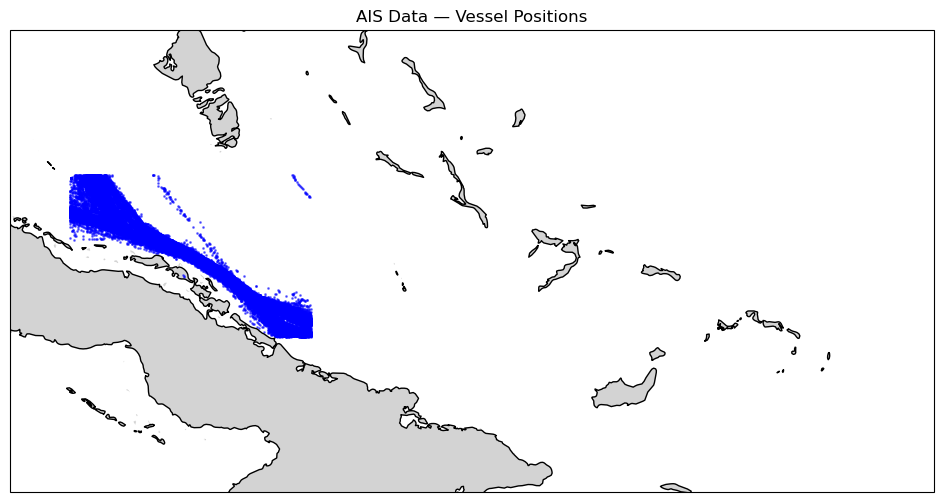

In [12]:
# Create map
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and land
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
# Set map extent: (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-80, -70, 20, 25])  # OBC Region

# Plot points
ax.scatter(ais_data['LON_AVG'], ais_data['LAT_AVG'], s=1, c='blue', alpha=0.5, transform=ccrs.PlateCarree())

plt.title("AIS Data — Vessel Positions")
plt.show()

### Linear Regression

In [13]:
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [14]:
ais_data.describe()

,MSG_TYPE,MMSI,IMO_NUMBER,LAT_AVG,LON_AVG,SPEED_KNOTS,COG_DEG,HEADING_DEG,NAV_STATUS,NAV_SENSOR,SHIP_AND_CARGO_TYPE,DRAUGHT,DRAUGHT.1,DIM_BOW,DIM_STERN,DIM_PORT,DIM_STARBOARD
count,131308.000000,1.313080e+05,1.290520e+05,131308.000000,131308.000000,131279.000000,131278.000000,124996.000000,131250.000000,129066.000000,131308.000000,129052.000000,129052.000000,131308.000000,131308.000000,131308.000000,131308.000000
mean,1.084153,4.251406e+08,1.134604e+07,22.430786,-77.966318,12.948072,193.514300,191.895365,0.111078,1.773891,74.818328,8.031661,8.031661,145.938960,32.684452,14.458632,13.669967
std,0.523275,1.552293e+08,4.205095e+07,0.426471,0.717202,3.011823,88.919615,89.503449,0.885052,3.144846,5.487924,2.848435,2.848435,56.204216,25.807705,6.812648,7.673526
min,1.000000,2.050420e+08,0.000000e+00,21.682275,-79.353167,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.050790e+08,9.274317e+06,22.062584,-78.588595,11.100000,115.900000,115.000000,0.000000,1.000000,70.000000,6.400000,6.400000,123.000000,18.000000,9.000000,8.000000
50%,1.000000,3.572850e+08,9.410260e+06,22.461880,-77.902693,12.800000,133.000000,132.000000,0.000000,1.000000,71.000000,7.800000,7.800000,148.000000,28.000000,14.000000,12.000000
75%,1.000000,5.634220e+08,9.712553e+06,22.754735,-77.349776,14.800000,294.300000,294.000000,0.000000,1.000000,80.000000,9.800000,9.800000,175.000000,38.000000,20.000000,19.000000
max,18.000000,7.202020e+08,9.675559e+08,23.433000,-76.744184,24.700000,358.800000,359.000000,15.000000,15.000000,89.000000,22.000000,22.000000,334.000000,256.000000,50.000000,44.000000


In [15]:
ais_data.columns

Index(['MSG_TYPE', 'MMSI', 'NAME', 'IMO_NUMBER', 'CALL_SIGN', 'LAT_AVG',
       'LON_AVG', 'PERIOD', 'SPEED_KNOTS', 'COG_DEG', 'HEADING_DEG',
       'NAV_STATUS', 'NAV_SENSOR', 'SHIP_AND_CARGO_TYPE', 'DRAUGHT',
       'DRAUGHT.1', 'DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD',
       'DESTINATION', 'MMSI_COUNTRY_CD', 'RECEIVER', 'VesselType'],
      dtype='object')

In [16]:
predictors = ais_data[['MMSI', 'PERIOD', 'LAT_AVG', 'LON_AVG', 'SPEED_KNOTS', 'COG_DEG']].dropna()

predictors = predictors.sort_values(['MMSI', 'PERIOD'])

ais_data['LAT_next'] = ais_data.groupby('MMSI')['LAT_AVG'].shift(-1)
ais_data = ais_data.dropna()

# Handle circular COG
ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
ais_data['COG_cos'] = np.cos(np.deg2rad(ais_data['COG_DEG']))

# Define X and y
X = ais_data[['LAT_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']]
y = ais_data['LAT_next']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

# Add intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression
model = sm.OLS(y_train, X_train)
results = model.fit()


C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\583992966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\583992966.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['COG_cos'] = np.cos(np.deg2rad(ais_data['COG_DEG']))


In [17]:
# Output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               LAT_next   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 5.249e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:24:25   Log-Likelihood:                 11606.
No. Observations:               58095   AIC:                        -2.320e+04
Df Residuals:                   58090   BIC:                        -2.316e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8046      0.044     64.414      

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\795639614.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\795639614.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


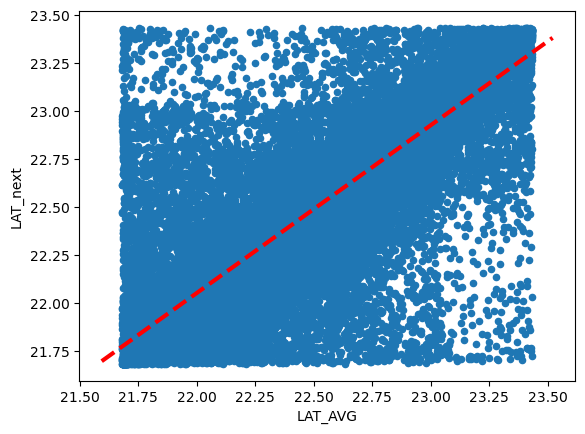

In [18]:
# Defining Functions
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = ais_data.plot.scatter('LAT_AVG', 'LAT_next')
abline(ax,
 results.params[0],
 results.params[1],
 'r--',
 linewidth=3)

In [19]:
ais_data['LAT_next'] = ais_data.groupby('MMSI')['LAT_AVG'].shift(-1) 

# Handle circular COG
ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG'])) 
ais_data['COG_cos'] = np.cos(np.deg2rad(ais_data['COG_DEG'])) 

# Drop rows with NaNs created by shift(-1)
model_data = ais_data[['LAT_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos', 'LAT_next']].dropna()

X = model_data[['LAT_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']]
y = model_data['LAT_next']

# Add intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X)
results = model.fit()
results.summary()

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\1659288017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['LAT_next'] = ais_data.groupby('MMSI')['LAT_AVG'].shift(-1)
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\1659288017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\1659288017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LAT_next   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 6.565e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:24:25   Log-Likelihood:                 15415.
No. Observations:               70790   AIC:                        -3.082e+04
Df Residuals:                   70785   BIC:                        -3.077e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7643      0.039     71.083      0.000       2.688       2.841
LAT_AVG         0.8765      0.002    506.394      0.000       0.873       0.880
SPEED_KNOTS     0.0008      0.000      3.286      0.001       0.000       0.001
COG_sin        -0.0147      0.002     -7.828      0.000      -0.018      -0.011
COG_cos         0.0770      0.003     27.634      0.000       0.072       0.082
==============================================================================
Omnibus:                    22195.095   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1099857.282
Skew:                           0.746   Prob(JB):                         0.00
Kurtosis:                      22.253   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3226914746.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3226914746.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


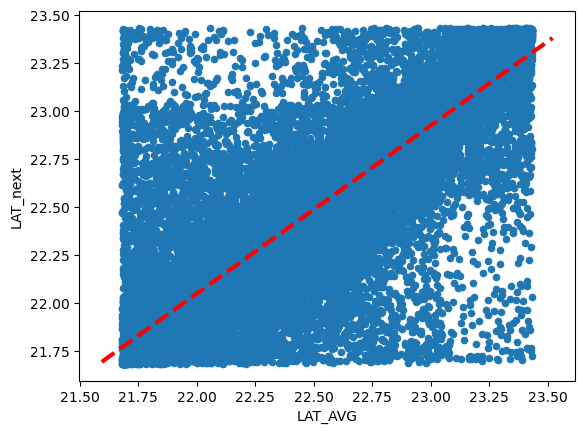

In [20]:
ax = ais_data.plot.scatter('LAT_AVG', 'LAT_next')
abline(ax,
 results.params[0],
 results.params[1],
 'r--',
 linewidth=3)

In [21]:
predictors = ais_data[['MMSI', 'PERIOD', 'LAT_AVG', 'LON_AVG', 'SPEED_KNOTS', 'COG_DEG']].dropna()

predictors = predictors.sort_values(['MMSI', 'PERIOD'])

ais_data['LON_next'] = ais_data.groupby('MMSI')['LON_AVG'].shift(-1)
ais_data = ais_data.dropna()

# Handle circular COG
ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
ais_data['COG_cos'] = np.cos(np.deg2rad(ais_data['COG_DEG']))

# Define X and y
X = ais_data[['LON_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']]
y = ais_data['LON_next']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

# Add intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression
model = sm.OLS(y_train, X_train)
results = model.fit()

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\2170385946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['LON_next'] = ais_data.groupby('MMSI')['LON_AVG'].shift(-1)
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\2170385946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\2170385946.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [22]:
# Output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               LON_next   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 5.364e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:24:26   Log-Likelihood:                -16319.
No. Observations:               56632   AIC:                         3.265e+04
Df Residuals:                   56627   BIC:                         3.269e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.0864      0.149    -60.872      

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3638913504.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3638913504.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


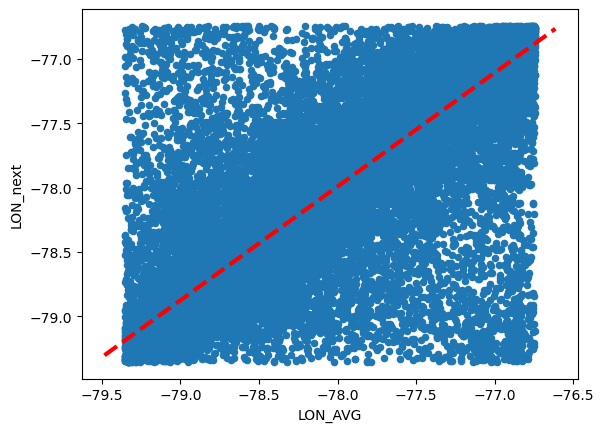

In [23]:
ax = ais_data.plot.scatter('LON_AVG', 'LON_next')
abline(ax,
 results.params[0],
 results.params[1],
 'r--',
 linewidth=3)

In [24]:
ais_data['LON_next'] = ais_data.groupby('MMSI')['LON_AVG'].shift(-1) 

# Handle circular COG
ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG'])) 
ais_data['COG_cos'] = np.cos(np.deg2rad(ais_data['COG_DEG'])) 

# Drop rows with NaNs created by shift(-1)
model_data = ais_data[['LON_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos', 'LON_next']].dropna()

X = model_data[['LON_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']]
y = model_data['LON_next']

# Add intercept
X = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X)
results = model.fit()
results.summary()

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3135800281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['LON_next'] = ais_data.groupby('MMSI')['LON_AVG'].shift(-1)
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3135800281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_data['COG_sin'] = np.sin(np.deg2rad(ais_data['COG_DEG']))
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3135800281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LON_next   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 6.512e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:24:27   Log-Likelihood:                -19605.
No. Observations:               69077   AIC:                         3.922e+04
Df Residuals:                   69072   BIC:                         3.927e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.1683      0.135    -67.822      0.000      -9.433      -8.903
LON_AVG         0.8823      0.002    509.007      0.000       0.879       0.886
SPEED_KNOTS    -0.0010      0.000     -2.427      0.015      -0.002      -0.000
COG_sin         0.0785      0.003     25.012      0.000       0.072       0.085
COG_cos        -0.0357      0.005     -7.678      0.000      -0.045      -0.027
==============================================================================
Omnibus:                    21784.862   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1063795.345
Skew:                          -0.760   Prob(JB):                         0.00
Kurtosis:                      22.165   Cond. No.                     8.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3638913504.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\DJBird\AppData\Local\Temp\ipykernel_23160\3638913504.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


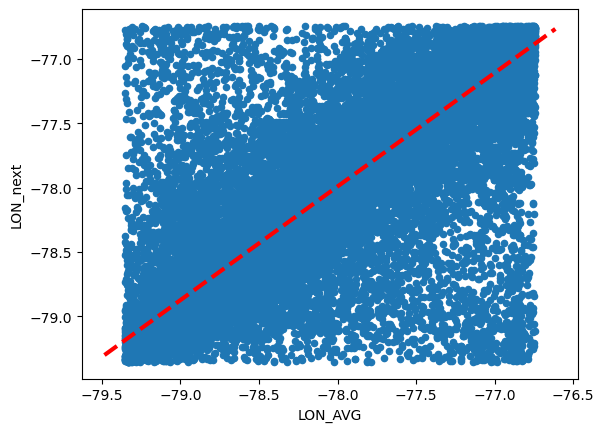

In [25]:
ax = ais_data.plot.scatter('LON_AVG', 'LON_next')
abline(ax,
 results.params[0],
 results.params[1],
 'r--',
 linewidth=3)

### Graph Embeddings

In [26]:
def create_encounter_dict(df, time_bin_minutes=10, lat_col='LAT_AVG', lon_col='LON_AVG', mmsi_col='MMSI', radius_deg=0.01):
    """
    Returns a dictionary: {MMSI: [list of MMSIs encountered in same space-time bucket]}
    
    Parameters:
        df: pandas DataFrame with columns [MMSI, BaseDateTime, LAT, LON]
        time_bin_minutes: size of time bucket
        radius_deg: spatial tolerance in degrees (~0.01 ≈ 1 km)
    """
    df = df.copy()
    time_col = 'PERIOD'
    df[time_col] = pd.to_datetime(df[time_col], utc=True)

    # Create time bins
    df['time_bin'] = (df[time_col].astype('int64') // (time_bin_minutes*60*10**9))     # converts each timestamp into its integer representation in nanoseconds since the Unix epoch (1970-01-01T00:00:00Z).

    encounter_dict = dict()
    
    # Initialize empty list for each MMSI
    for mmsi in df[mmsi_col].unique():
        encounter_dict[mmsi] = set()
    
    # Group by time_bin for efficiency
    for _, group in df.groupby('time_bin'):                                         # Grouping by time bin.
        coords = group[[lat_col, lon_col]].to_numpy()
        mmsis = group[mmsi_col].to_numpy()
        n = len(group)
        # Compare each pair (i,j) in the time bin
        for i in range(n):
            lat_i, lon_i = coords[i]
            mmsi_i = mmsis[i]
            for j in range(i+1, n):
                lat_j, lon_j = coords[j]
                mmsi_j = mmsis[j]
                # check if within spatial radius
                if abs(lat_i - lat_j) <= radius_deg and abs(lon_i - lon_j) <= radius_deg:
                    encounter_dict[mmsi_i].add(mmsi_j)
                    encounter_dict[mmsi_j].add(mmsi_i)
    
    # Convert sets to lists
    encounter_dict = {k: list(v) for k,v in encounter_dict.items()}
    return encounter_dict

In [27]:
encounter_dict = create_encounter_dict(ais_data)

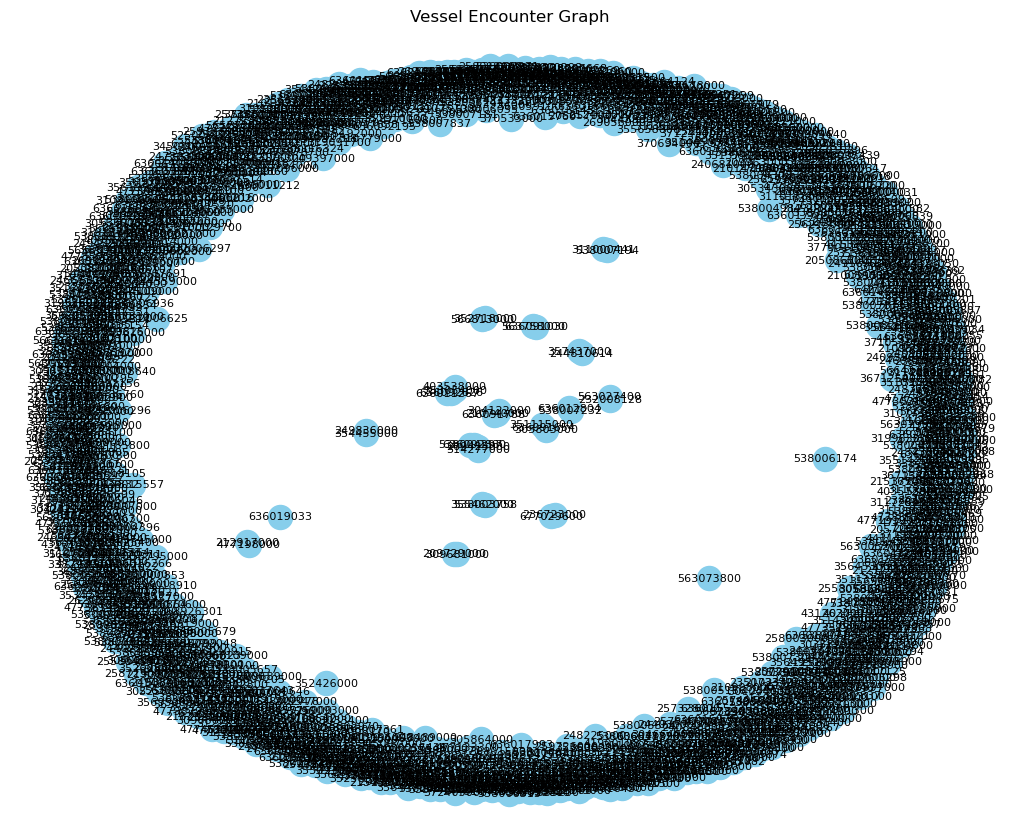

In [28]:
G = nx.Graph()

# Add all MMSIs as nodes (isolated nodes included)
G.add_nodes_from(encounter_dict.keys())

# Add edges (ignoring self-loops)
for mmsi, neighbors in encounter_dict.items():
    for neighbor in neighbors:
        if neighbor != mmsi:   # ignore loops
            G.add_edge(mmsi, neighbor)


plt.figure(figsize=(10, 8))
nx.draw(G, 
        with_labels=True,       # show MMSI labels
        node_size=300, 
        node_color='skyblue', 
        edge_color='gray', 
        font_size=8)
plt.title("Vessel Encounter Graph")
plt.show()

In [29]:
import pickle

# Save
with open("CapstoneOBCgraph.pkl", "wb") as f:
    pickle.dump(G,f)

In [30]:
ais_data.to_json("ais_data.json", orient = "records", lines = True)

In [31]:
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print(f'Ratio edges to nodes: {round(G.number_of_edges() / G.number_of_nodes(), 2)}')
print("Connected components:", nx.number_connected_components(G))
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print("Average degree:", avg_degree)

Nodes: 1713
Edges: 25
Ratio edges to nodes: 0.01
Connected components: 1688
Average degree: 0.02918855808523059


In [32]:
# Static and dynamic columns
static_cols = ['MSG_TYPE', 'MMSI', 'NAME', 'IMO_NUMBER', 'CALL_SIGN',
       'NAV_STATUS', 'NAV_SENSOR', 'SHIP_AND_CARGO_TYPE', 'DRAUGHT',
       'DRAUGHT.1', 'DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD',
       'DESTINATION', 'MMSI_COUNTRY_CD', 'RECEIVER', 'VesselType']

dynamic_cols = ["LAT_AVG", "LON_AVG", "SPEED_KNOTS", "COG_DEG", "HEADING_DEG"]

In [33]:
# Build the aggregation dictionary using *named aggregation* correctly
agg_dict = {}

# Static columns → just take the first non-null value
for col in static_cols:
    agg_dict[col] = (col, "first")

# Dynamic columns → compute stats
for col in dynamic_cols:
    agg_dict[f"{col}_mean"] = (col, "mean")
    agg_dict[f"{col}_min"] = (col, "min")
    agg_dict[f"{col}_max"] = (col, "max")
    agg_dict[f"{col}_std"] = (col, "std")

# BaseDateTime → only min and max
agg_dict["PERIOD"] = ("PERIOD", "min")
agg_dict["PERIOD"] = ("PERIOD", "max")

In [34]:
# Group and aggregate
df_summary = (
    ais_data.groupby("MMSI")
           .agg(**agg_dict)
           
)

In [35]:
df_summary.head()

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,NAV_STATUS,NAV_SENSOR,SHIP_AND_CARGO_TYPE,DRAUGHT,DRAUGHT.1,...,SPEED_KNOTS_std,COG_DEG_mean,COG_DEG_min,COG_DEG_max,COG_DEG_std,HEADING_DEG_mean,HEADING_DEG_min,HEADING_DEG_max,HEADING_DEG_std,PERIOD
MMSI,,,,,,,,,,,,,,,,,,,,,
205042000,1,205042000,DELOS,9877767.0,ONKR,0.0,1.0,80,11.0,11.0,...,0.313085,119.135714,109.3,130.3,9.349340,119.500000,107.0,130.0,9.304672,2023-06-04 20:35:00.000
205086000,1,205086000,DORIS,9877781.0,ONKY,0.0,1.0,80,11.1,11.1,...,0.412531,117.636364,110.3,132.7,8.603054,117.181818,107.0,133.0,9.325430,2023-03-20 01:45:00.000
205089000,1,205089000,DICKENS,9898553.0,ONKZ,0.0,1.0,80,10.9,10.9,...,0.609637,117.867391,106.0,133.3,8.461391,116.891304,106.0,132.0,8.613241,2023-09-27 18:35:00.000
205111000,1,205111000,CASSIUS,9937098.0,ONLN,8.0,1.0,80,11.0,11.0,...,0.245855,113.910000,108.4,132.3,9.537697,113.500000,107.0,133.0,10.102255,2023-09-01 19:45:00.000
205283000,1,205283000,KAPRIJKE,9687485.0,ONIK,0.0,1.0,80,10.3,10.3,...,1.708624,221.657143,110.0,312.1,92.987300,220.857143,109.0,313.0,92.886910,2024-04-02 23:05:00.000


In [36]:
df_summary["num_records"] = ais_data.groupby("MMSI").size().values

In [37]:
# Make sure PERIOD is a datetime type
ais_data["PERIOD"] = pd.to_datetime(ais_data["PERIOD"])

# Sort so we can compute differences correctly
ais_data = ais_data.sort_values(["MMSI", "PERIOD"])

# Compute time differences (in seconds) between consecutive messages per MMSI
ais_data["time_diff_sec"] = (
    ais_data.groupby("MMSI")["PERIOD"]
           .diff()
           .dt.total_seconds()
)

# Now average those differences per vessel
avg_gap = (
    ais_data.groupby("MMSI")["time_diff_sec"]
           .mean()
           .reset_index(name="avg_time_gap_sec")
)

In [38]:
ais_data.groupby("MMSI")["time_diff_sec"].agg(["mean", "median", "max"])

,mean,median,max
MMSI,,,
205042000,1.823077e+03,1200.0,8700.0
205086000,2.820000e+03,1050.0,13800.0
205089000,4.045200e+05,900.0,18142500.0
205111000,2.233333e+03,600.0,13500.0
205283000,3.574615e+04,2400.0,420900.0
...,...,...,...
636092880,2.255781e+04,600.0,3474000.0
636092892,2.459650e+06,1200.0,44241300.0
642122017,3.075000e+03,300.0,29700.0


In [39]:
df_summary.head()

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,NAV_STATUS,NAV_SENSOR,SHIP_AND_CARGO_TYPE,DRAUGHT,DRAUGHT.1,...,COG_DEG_mean,COG_DEG_min,COG_DEG_max,COG_DEG_std,HEADING_DEG_mean,HEADING_DEG_min,HEADING_DEG_max,HEADING_DEG_std,PERIOD,num_records
MMSI,,,,,,,,,,,,,,,,,,,,,
205042000,1,205042000,DELOS,9877767.0,ONKR,0.0,1.0,80,11.0,11.0,...,119.135714,109.3,130.3,9.349340,119.500000,107.0,130.0,9.304672,2023-06-04 20:35:00.000,14
205086000,1,205086000,DORIS,9877781.0,ONKY,0.0,1.0,80,11.1,11.1,...,117.636364,110.3,132.7,8.603054,117.181818,107.0,133.0,9.325430,2023-03-20 01:45:00.000,11
205089000,1,205089000,DICKENS,9898553.0,ONKZ,0.0,1.0,80,10.9,10.9,...,117.867391,106.0,133.3,8.461391,116.891304,106.0,132.0,8.613241,2023-09-27 18:35:00.000,46
205111000,1,205111000,CASSIUS,9937098.0,ONLN,8.0,1.0,80,11.0,11.0,...,113.910000,108.4,132.3,9.537697,113.500000,107.0,133.0,10.102255,2023-09-01 19:45:00.000,10
205283000,1,205283000,KAPRIJKE,9687485.0,ONIK,0.0,1.0,80,10.3,10.3,...,221.657143,110.0,312.1,92.987300,220.857143,109.0,313.0,92.886910,2024-04-02 23:05:00.000,14


In [40]:
# numeric columns (everything except identifiers and VesselType_Str)
numeric_cols = df_summary.select_dtypes(include=[np.number]).columns.tolist()

# remove MMSI if present
numeric_cols = [c for c in numeric_cols if c != "MMSI"]

# categorical target
target_col = "VesselType"


In [41]:
df_summary.groupby(target_col)[numeric_cols].mean().T


VesselType,"Cargo, Hazardous category A","Cargo, Hazardous category B","Cargo, Hazardous category C","Cargo, Hazardous category D","Cargo, No additional information","Cargo, Reserved for future use","Cargo, all ships of this type","Tanker, Hazardous category A","Tanker, Hazardous category B","Tanker, Hazardous category C","Tanker, Hazardous category D","Tanker, No additional information","Tanker, Reserved for future use","Tanker, all ships of this type"
MSG_TYPE,1.031746e+00,1.000000e+00,1.000000e+00,1.125000e+00,1.053571e+00,1.400000e+00,1.074197e+00,1.080000e+00,1.000000e+00,1.166667e+00,1.000000e+00,1.085106e+00,1.333333e+00,1.075377e+00
IMO_NUMBER,9.397112e+06,9.185241e+06,9.837114e+06,9.423841e+06,9.425439e+06,9.324690e+06,1.301400e+07,9.561364e+06,9.533407e+06,9.386759e+06,9.618100e+06,9.424323e+06,9.231571e+06,1.191219e+07
NAV_STATUS,1.587302e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.872647e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.510638e-02,0.000000e+00,2.010050e-02
NAV_SENSOR,1.301587e+00,1.400000e+00,1.000000e+00,1.062500e+00,1.482143e+00,8.000000e-01,1.424142e+00,1.640000e+00,1.000000e+00,2.166667e+00,1.500000e+00,1.329787e+00,1.000000e+00,1.314070e+00
SHIP_AND_CARGO_TYPE,7.100000e+01,7.200000e+01,7.300000e+01,7.400000e+01,7.900000e+01,7.600000e+01,7.000000e+01,8.100000e+01,8.200000e+01,8.300000e+01,8.400000e+01,8.900000e+01,8.600000e+01,8.000000e+01
DRAUGHT,1.050794e+01,1.010000e+01,1.390000e+01,9.162500e+00,8.069643e+00,6.760000e+00,8.664784e+00,9.744000e+00,8.800000e+00,9.408333e+00,9.582143e+00,9.221277e+00,7.950000e+00,9.655025e+00
DRAUGHT.1,1.050794e+01,1.010000e+01,1.390000e+01,9.162500e+00,8.069643e+00,6.760000e+00,8.664784e+00,9.744000e+00,8.800000e+00,9.408333e+00,9.582143e+00,9.221277e+00,7.950000e+00,9.655025e+00
DIM_BOW,1.888889e+02,1.747000e+02,1.175000e+02,1.653125e+02,1.450000e+02,1.034000e+02,1.527154e+02,1.859600e+02,1.448462e+02,1.640000e+02,1.873929e+02,1.638936e+02,1.515000e+02,1.793166e+02
DIM_STERN,6.473016e+01,5.470000e+01,1.665000e+02,5.050000e+01,3.685714e+01,4.740000e+01,3.347398e+01,4.392000e+01,3.235897e+01,3.550000e+01,4.989286e+01,3.369149e+01,2.966667e+01,3.869849e+01
DIM_PORT,1.828571e+01,1.390000e+01,2.300000e+01,1.656250e+01,1.302679e+01,9.600000e+00,1.475415e+01,1.820000e+01,1.358974e+01,1.458333e+01,1.814286e+01,1.545745e+01,1.416667e+01,1.723869e+01


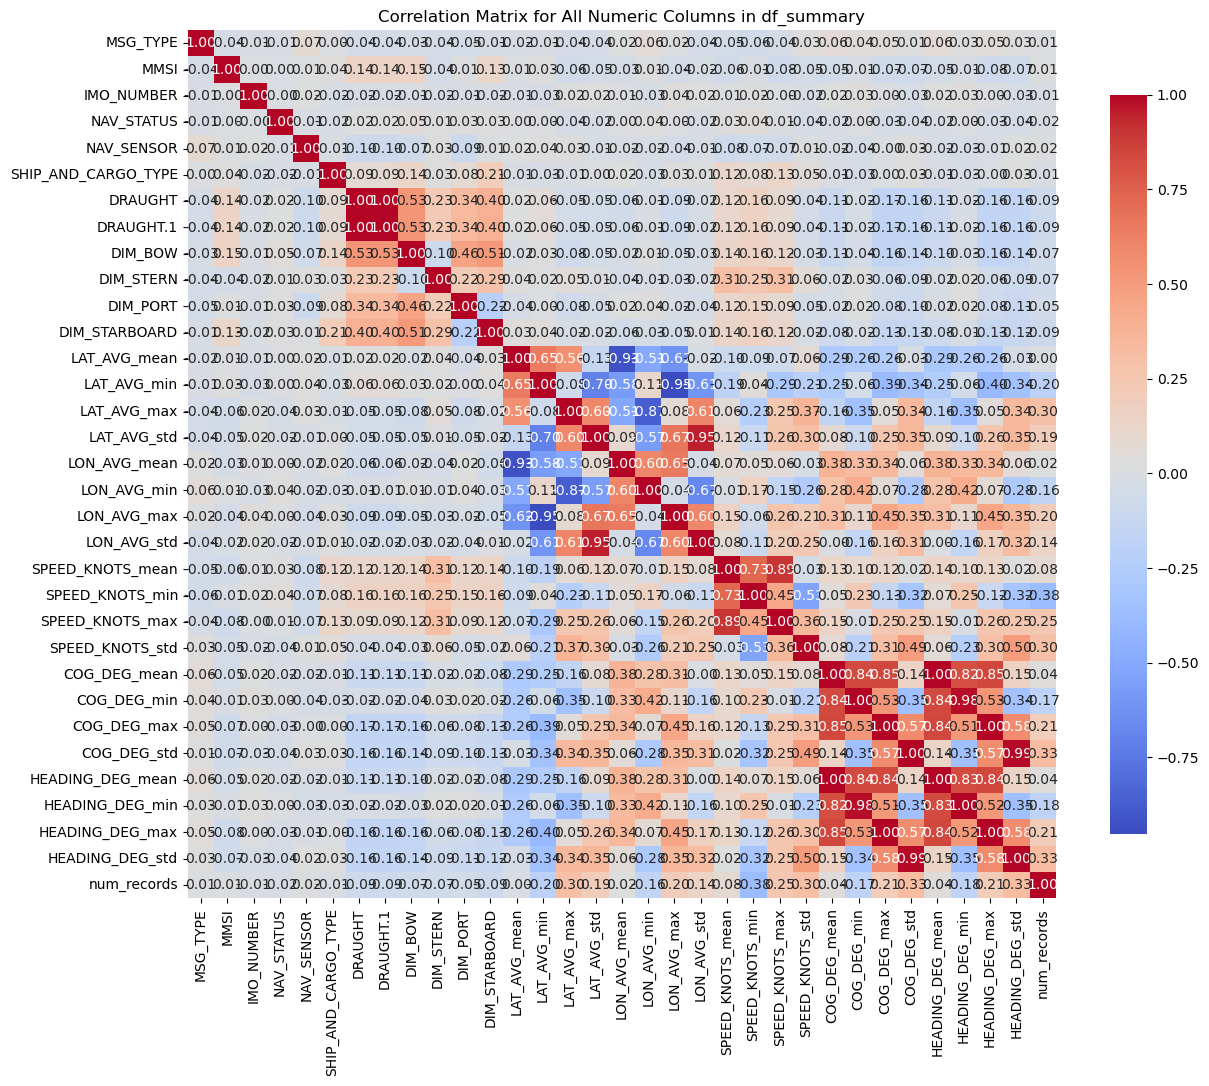

In [42]:
import seaborn as sns

# Select only numeric columns
numeric_cols_all = df_summary.select_dtypes(include="number").columns

# Fill NaNs with 0 (or use mean imputation)
df_numeric = df_summary[numeric_cols_all].fillna(0)
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix for All Numeric Columns in df_summary")
plt.show()

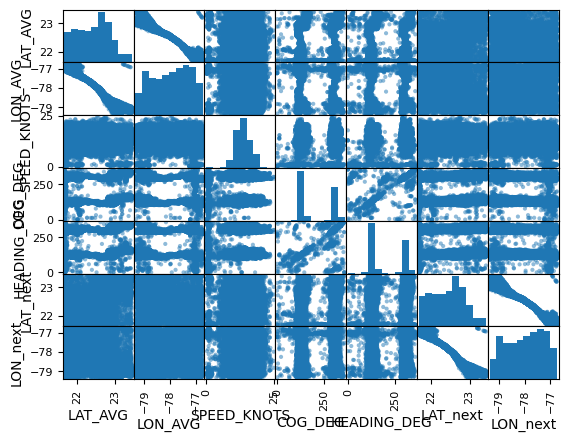

In [43]:
plot_data = ais_data[['LAT_AVG','LON_AVG','SPEED_KNOTS','COG_DEG', 'HEADING_DEG', 'LAT_next','LON_next']].dropna()
pd.plotting.scatter_matrix(plot_data);

In [44]:
plot_data.corr

<bound method DataFrame.corr of           LAT_AVG    LON_AVG  SPEED_KNOTS  COG_DEG  HEADING_DEG   LAT_next  \
116677  22.736758 -78.616947         13.0    110.0        111.0  22.707576   
116686  22.707576 -78.536280         13.1    111.2        112.0  22.705818   
116687  22.705818 -78.531350         13.1    111.3        112.0  22.666790   
116698  22.666790 -78.419349         13.3    110.4        111.0  22.654898   
116703  22.654898 -78.384704         13.4    110.2        111.0  22.593179   
...           ...        ...          ...      ...          ...        ...   
98635   22.929721 -78.687382         12.2    308.9        310.0  22.941191   
98636   22.941191 -78.702635         12.2    308.8        310.0  22.954015   
98639   22.954015 -78.719890         12.4    308.5        310.0  22.963548   
98640   22.963548 -78.732505         12.3    309.1        310.0  22.972921   
98643   22.972921 -78.744902         12.2    309.9        310.0  22.124073   

         LON_next  
116677 -78.

# KNN Regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [46]:
features = ['LAT_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']

model_data = ais_data[features + ['LAT_next']].dropna()

X = model_data[features].values
y = model_data['LAT_next'].values


In [47]:
# ---- Train / test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

In [48]:
knns = [KNeighborsRegressor(n_neighbors = i) for i in range(1,20)]

fits = [knns[i].fit(X_train, y_train) for i in range(19)]

In [49]:
# R^2
k_values = range(1,20)
list_of_dicts = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
     # Metrics
    r2_train = knn.score(X_train, y_train)
    r2_test = knn.score(X_test, y_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"k={k}: R²(train)={r2_train:.3f}, R²(test)={r2_test:.5f}, "
          f"MSE(train)={mse_train:.3f}, MSE(test)={mse_test:.3f}")
    list_of_dicts.append({"k":k, "r2_train":r2_train, "r2_test": r2_test, "mse_train": mse_train, "mse_test": mse_test})

df = pd.DataFrame.from_dict(list_of_dicts)

k=1: R²(train)=1.000, R²(test)=0.60895, MSE(train)=0.000, MSE(test)=0.070
k=2: R²(train)=0.904, R²(test)=0.70193, MSE(train)=0.017, MSE(test)=0.053
k=3: R²(train)=0.871, R²(test)=0.73380, MSE(train)=0.023, MSE(test)=0.048
k=4: R²(train)=0.854, R²(test)=0.74928, MSE(train)=0.026, MSE(test)=0.045
k=5: R²(train)=0.843, R²(test)=0.75730, MSE(train)=0.028, MSE(test)=0.043
k=6: R²(train)=0.836, R²(test)=0.76308, MSE(train)=0.029, MSE(test)=0.042
k=7: R²(train)=0.831, R²(test)=0.76774, MSE(train)=0.030, MSE(test)=0.042
k=8: R²(train)=0.827, R²(test)=0.77092, MSE(train)=0.031, MSE(test)=0.041
k=9: R²(train)=0.823, R²(test)=0.77340, MSE(train)=0.032, MSE(test)=0.041
k=10: R²(train)=0.820, R²(test)=0.77536, MSE(train)=0.032, MSE(test)=0.040
k=11: R²(train)=0.818, R²(test)=0.77681, MSE(train)=0.032, MSE(test)=0.040
k=12: R²(train)=0.816, R²(test)=0.77821, MSE(train)=0.033, MSE(test)=0.040
k=13: R²(train)=0.814, R²(test)=0.77885, MSE(train)=0.033, MSE(test)=0.040
k=14: R²(train)=0.813, R²(test)=0.

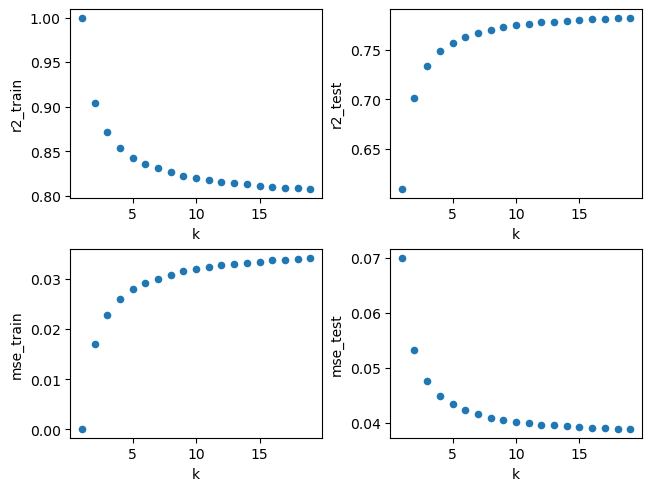

In [50]:
fig, axs = plt.subplots(2,2, layout = 'constrained');
df.plot.scatter('k', 'r2_train', ax = axs[0,0]);
df.plot.scatter('k', 'r2_test', ax = axs[0,1]);
df.plot.scatter('k', 'mse_train', ax = axs[1,0]);
df.plot.scatter('k', 'mse_test', ax = axs[1,1]);

# Decision Tree Regression

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [52]:
features = ['LAT_AVG', 'SPEED_KNOTS', 'COG_sin', 'COG_cos']

model_data = ais_data[features + ['LAT_next']].dropna()

In [53]:
X = model_data[features].values
y = model_data['LAT_next'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% test
    random_state=42,      # reproducibility
)

In [54]:
# Range of tree depths to test
depths = range(1, 11)
train_mse = []
test_mse = []

In [55]:
# Train and evaluate for each depth
for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

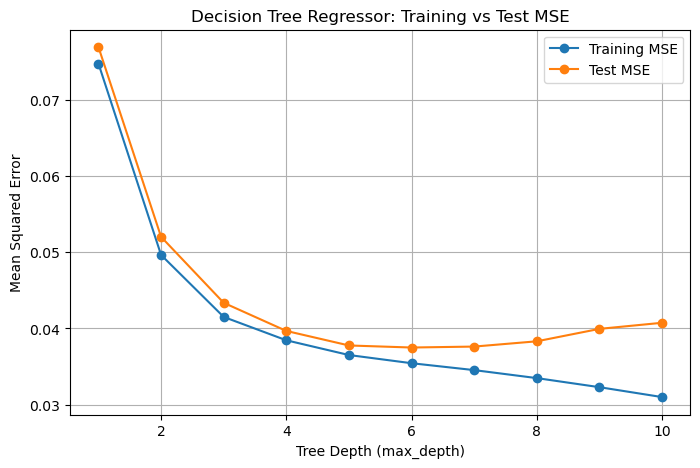

In [56]:
# Plot results
plt.figure(figsize=(8, 5))
plt.plot(depths, train_mse, "o-", label="Training MSE")
plt.plot(depths, test_mse, "o-", label="Test MSE")
plt.xlabel("Tree Depth (max_depth)")
plt.ylabel("Mean Squared Error")
plt.yscale('linear')
plt.title("Decision Tree Regressor: Training vs Test MSE")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
best_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
best_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


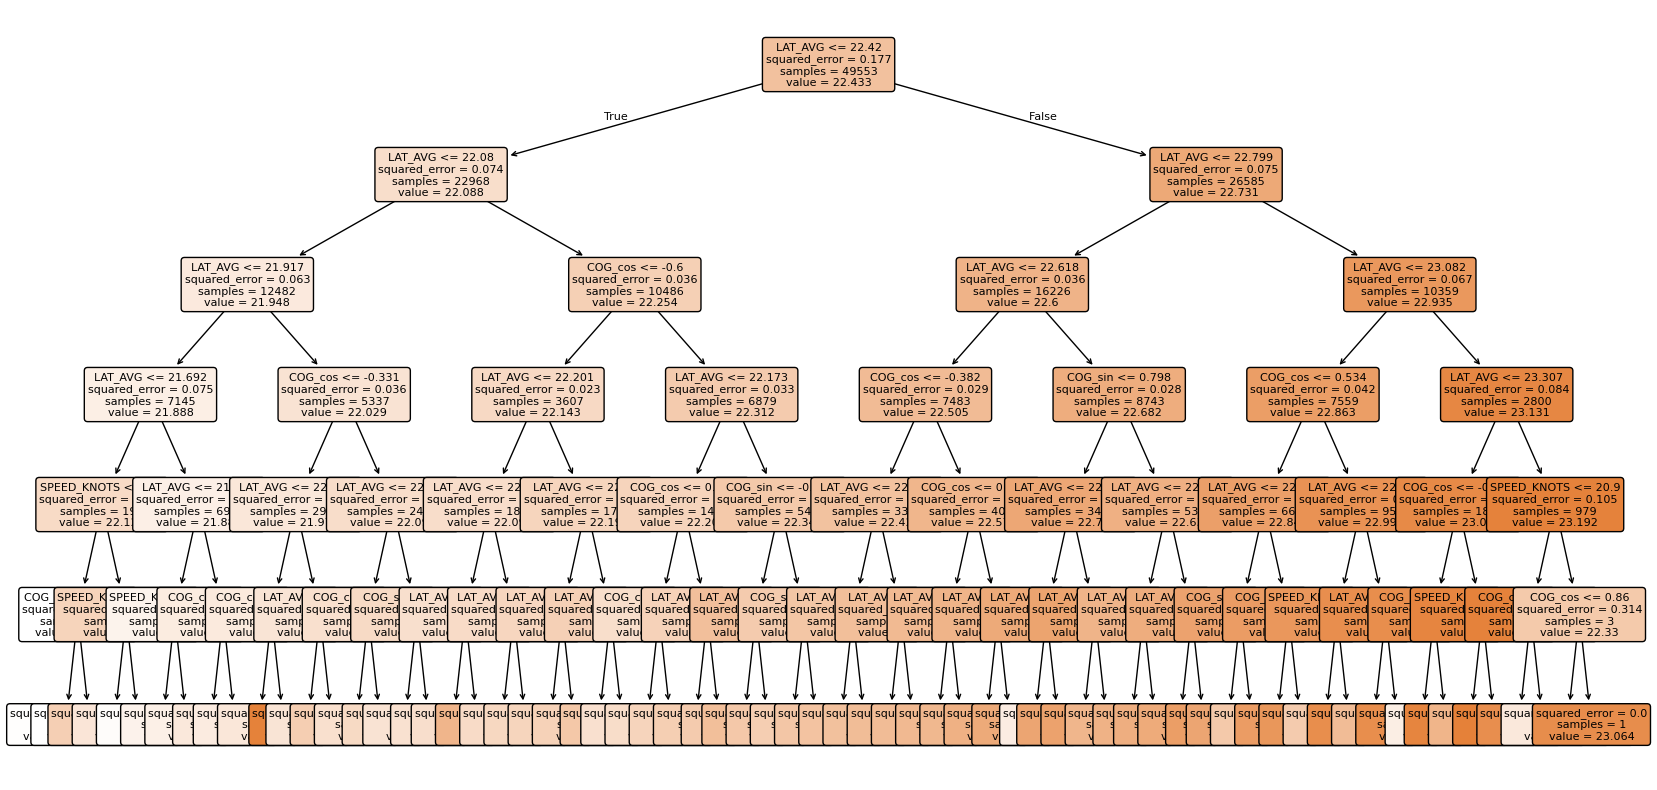

In [58]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=features,
          filled=True,
          rounded=True,
          fontsize=8)
plt.savefig("ais_data_matplotlib.pdf")  # saves PDF in current directory
plt.show()

# Logistic Regression

In [59]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

In [60]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
ais_data

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,...,DIM_STARBOARD,DESTINATION,MMSI_COUNTRY_CD,RECEIVER,VesselType,LAT_next,COG_sin,COG_cos,LON_next,time_diff_sec
116677,1,205042000,DELOS,9877767.0,ONKR,22.736758,-78.616947,2023-06-04 14:00:00,13.0,110.0,...,30,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.707576,0.939693,-0.342020,-78.536280,NaN
116686,1,205042000,DELOS,9877767.0,ONKR,22.707576,-78.536280,2023-06-04 14:20:00,13.1,111.2,...,30,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.705818,0.932324,-0.361625,-78.531350,1200.0
116687,1,205042000,DELOS,9877767.0,ONKR,22.705818,-78.531350,2023-06-04 14:25:00,13.1,111.3,...,30,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.666790,0.931691,-0.363251,-78.419349,300.0
116698,1,205042000,DELOS,9877767.0,ONKR,22.666790,-78.419349,2023-06-04 14:55:00,13.3,110.4,...,30,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.654898,0.937282,-0.348572,-78.384704,1800.0
116703,1,205042000,DELOS,9877767.0,ONKR,22.654898,-78.384704,2023-06-04 15:05:00,13.4,110.2,...,30,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.593179,0.938493,-0.345298,-78.203331,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98635,1,677062300,PEPIN EXPRESS,9196228.0,5IM723,22.929721,-78.687382,2025-05-25 11:55:00,12.2,308.9,...,10,HAINA,TZ,ORBCOMM-T,"Cargo, all ships of this type",22.941191,-0.778243,0.627963,-78.702635,300.0
98636,1,677062300,PEPIN EXPRESS,9196228.0,5IM723,22.941191,-78.702635,2025-05-25 12:00:00,12.2,308.8,...,10,HAINA,TZ,ORBCOMM-T,"Cargo, all ships of this type",22.954015,-0.779338,0.626604,-78.719890,300.0
98639,1,677062300,PEPIN EXPRESS,9196228.0,5IM723,22.954015,-78.719890,2025-05-25 12:05:00,12.4,308.5,...,10,HAINA,TZ,ORBCOMM-T,"Cargo, all ships of this type",22.963548,-0.782608,0.622515,-78.732505,300.0
98640,1,677062300,PEPIN EXPRESS,9196228.0,5IM723,22.963548,-78.732505,2025-05-25 12:10:00,12.3,309.1,...,10,HAINA,TZ,ORBCOMM-T,"Cargo, all ships of this type",22.972921,-0.776046,0.630676,-78.744902,300.0


In [62]:
ais_data["Anomaly"] = "Yes"
ais_data.loc[(ais_data["COG_DEG"].between(105, 135)) | (ais_data["COG_DEG"].between(285, 315)), "Anomaly"] = "No"
ais_data.head()

,MSG_TYPE,MMSI,NAME,IMO_NUMBER,CALL_SIGN,LAT_AVG,LON_AVG,PERIOD,SPEED_KNOTS,COG_DEG,...,DESTINATION,MMSI_COUNTRY_CD,RECEIVER,VesselType,LAT_next,COG_sin,COG_cos,LON_next,time_diff_sec,Anomaly
116677,1,205042000,DELOS,9877767.0,ONKR,22.736758,-78.616947,2023-06-04 14:00:00,13.0,110.0,...,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.707576,0.939693,-0.342020,-78.536280,NaN,No
116686,1,205042000,DELOS,9877767.0,ONKR,22.707576,-78.536280,2023-06-04 14:20:00,13.1,111.2,...,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.705818,0.932324,-0.361625,-78.531350,1200.0,No
116687,1,205042000,DELOS,9877767.0,ONKR,22.705818,-78.531350,2023-06-04 14:25:00,13.1,111.3,...,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.666790,0.931691,-0.363251,-78.419349,300.0,No
116698,1,205042000,DELOS,9877767.0,ONKR,22.666790,-78.419349,2023-06-04 14:55:00,13.3,110.4,...,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.654898,0.937282,-0.348572,-78.384704,1800.0,No
116703,1,205042000,DELOS,9877767.0,ONKR,22.654898,-78.384704,2023-06-04 15:05:00,13.4,110.2,...,SGSIN- PJSB,BE,rEV02,"Tanker, all ships of this type",22.593179,0.938493,-0.345298,-78.203331,600.0,No


In [63]:
ais_data.Anomaly.value_counts()

Anomaly
No     62226
Yes     8564
Name: count, dtype: int64

In [64]:
ais_data.columns

Index(['MSG_TYPE', 'MMSI', 'NAME', 'IMO_NUMBER', 'CALL_SIGN', 'LAT_AVG',
       'LON_AVG', 'PERIOD', 'SPEED_KNOTS', 'COG_DEG', 'HEADING_DEG',
       'NAV_STATUS', 'NAV_SENSOR', 'SHIP_AND_CARGO_TYPE', 'DRAUGHT',
       'DRAUGHT.1', 'DIM_BOW', 'DIM_STERN', 'DIM_PORT', 'DIM_STARBOARD',
       'DESTINATION', 'MMSI_COUNTRY_CD', 'RECEIVER', 'VesselType', 'LAT_next',
       'COG_sin', 'COG_cos', 'LON_next', 'time_diff_sec', 'Anomaly'],
      dtype='object')

In [65]:
allvars = ais_data.columns.drop(['MSG_TYPE', 'MMSI', 'NAME', 'IMO_NUMBER', 'CALL_SIGN', 'PERIOD',
                                 'DESTINATION', 'MMSI_COUNTRY_CD', 'RECEIVER', 'VesselType','LON_next', 
                                 'time_diff_sec', 'Anomaly']).dropna()

# 1. Define X (raw predictors) and y
X_raw = ais_data[allvars]
y = (ais_data.Anomaly == 'Yes')

# 2. Split first
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Build design matrices (fit_transform for training set)
design = MS(allvars)
X_train = design.fit_transform(X_train_raw)
X_test  = design.transform(X_test_raw)   # only transform on test set

# 4. Train model
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()

# 5. Summarize
summarize(results)

# 6. Evaluate on test
y_pred_probs = results.predict(X_test)

In [66]:
results.params

intercept             -79.814221
LAT_AVG                 2.917033
LON_AVG                 0.207360
SPEED_KNOTS            -0.168276
COG_DEG                 0.103462
HEADING_DEG             0.015658
NAV_STATUS              0.230214
NAV_SENSOR             -0.050980
SHIP_AND_CARGO_TYPE     0.027143
DRAUGHT                -0.016215
DRAUGHT.1              -0.016215
DIM_BOW                 0.010297
DIM_STERN               0.010614
DIM_PORT               -0.077064
DIM_STARBOARD          -0.090478
LAT_next                0.139995
COG_sin                 7.733780
COG_cos                -7.864136
dtype: float64

In [67]:
results.pvalues

intercept               4.962334e-38
LAT_AVG                 1.423822e-29
LON_AVG                 1.517891e-01
SPEED_KNOTS            1.846077e-109
COG_DEG                 0.000000e+00
HEADING_DEG             6.379134e-31
NAV_STATUS              8.782897e-20
NAV_SENSOR              2.359410e-08
SHIP_AND_CARGO_TYPE     1.530382e-12
DRAUGHT                 1.510559e-02
DRAUGHT.1               1.510559e-02
DIM_BOW                 6.040509e-27
DIM_STERN               9.870613e-20
DIM_PORT                1.652567e-29
DIM_STARBOARD           7.670352e-41
LAT_next                1.920400e-01
COG_sin                 0.000000e+00
COG_cos                 0.000000e+00
dtype: float64

In [68]:
probs = results.predict()

In [69]:
probs

array([0.01603662, 0.03080393, 0.00636997, ..., 0.01138793, 0.00666071,
       0.05263866])

In [70]:
y_train_probs = results.predict(X_train)
y_train_pred = (y_train_probs > 0.5).astype(int)   # threshold at 0.5
cm_train = confusion_table(y_train, y_train_pred)

print("Training Confusion Matrix:")
print(cm_train)
print(classification_report(y_train, y_train_pred))

Training Confusion Matrix:
Truth          0     1
Predicted             
0          43512    46
1           1385  4610
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     43558
        True       0.99      0.77      0.87      5995

    accuracy                           0.97     49553
   macro avg       0.98      0.88      0.92     49553
weighted avg       0.97      0.97      0.97     49553



In [71]:
y_test_probs = results.predict(X_test)
y_test_pred = (y_test_probs > 0.5).astype(int)
cm_test = confusion_table(y_test, y_test_pred)

print("\nTest Confusion Matrix:")
print(cm_test)
print(classification_report(y_test, y_test_pred))


Test Confusion Matrix:
Truth          0     1
Predicted             
0          18651    17
1            589  1980
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     18668
        True       0.99      0.77      0.87      2569

    accuracy                           0.97     21237
   macro avg       0.98      0.88      0.93     21237
weighted avg       0.97      0.97      0.97     21237



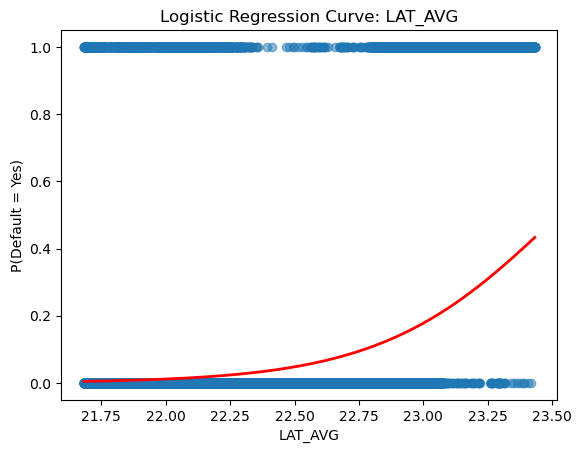

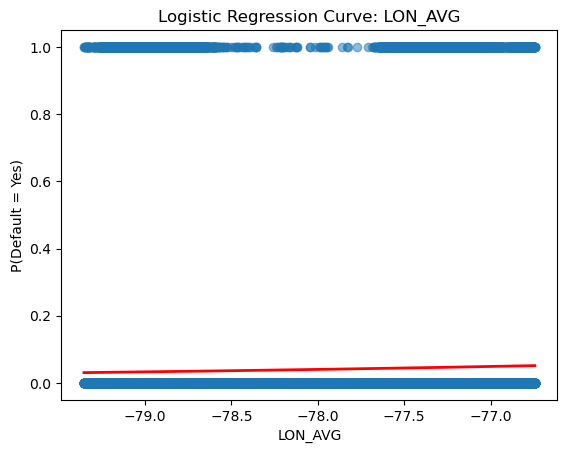

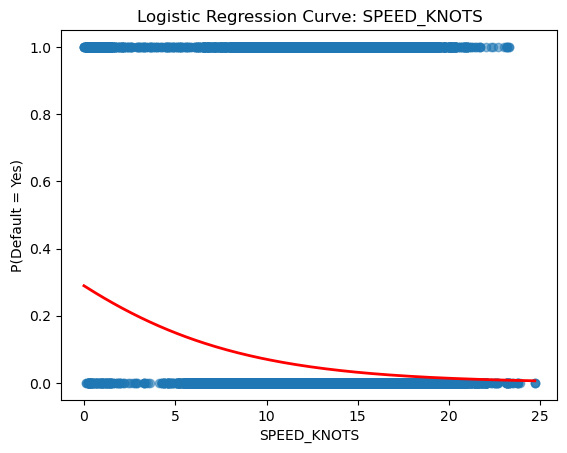

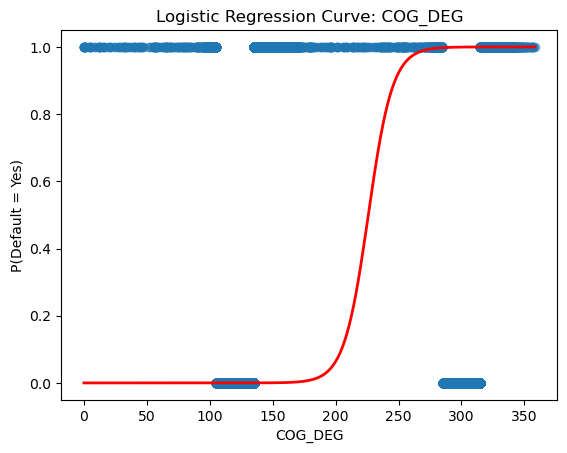

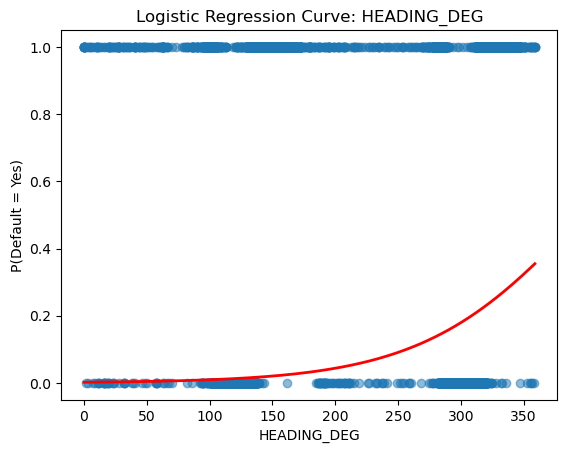

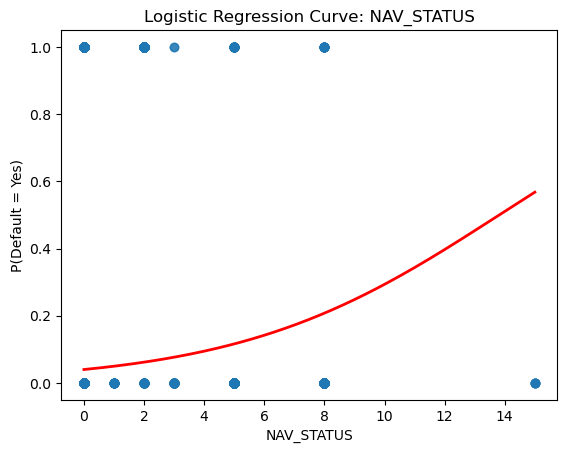

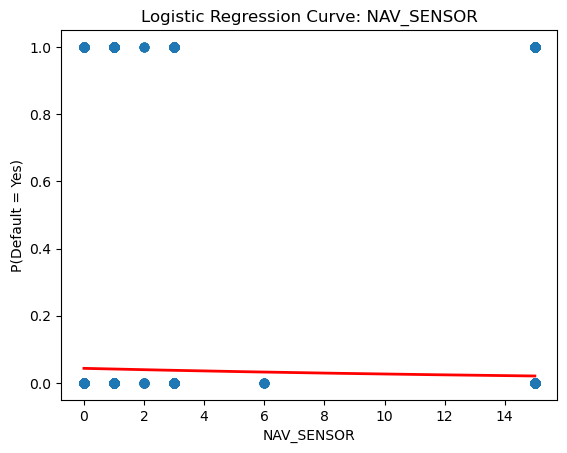

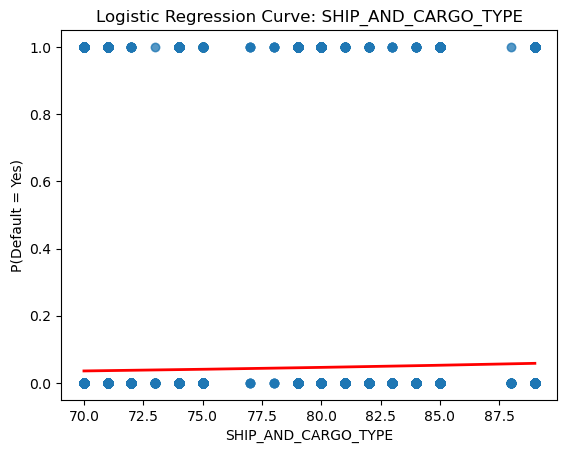

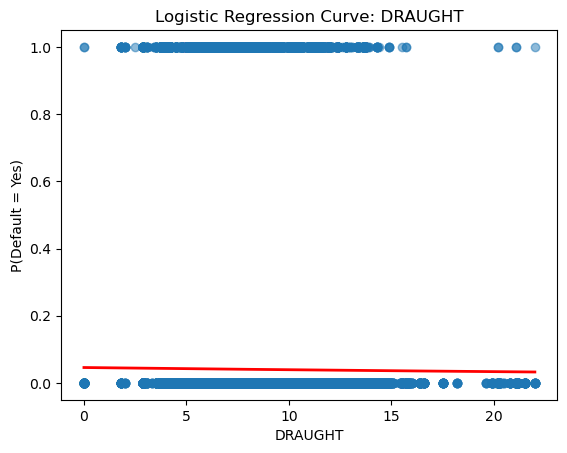

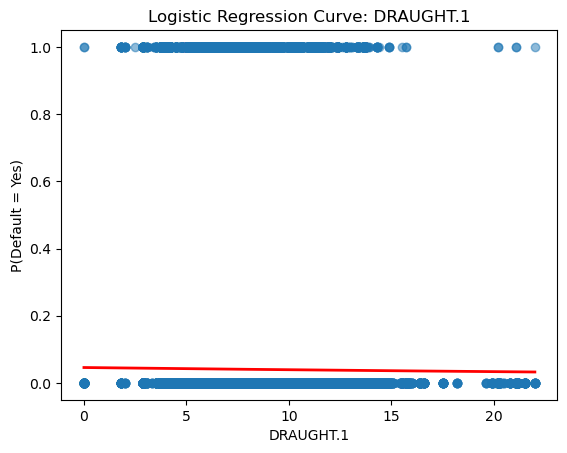

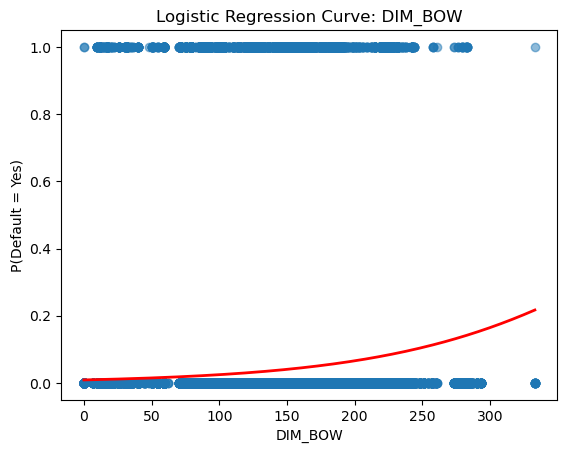

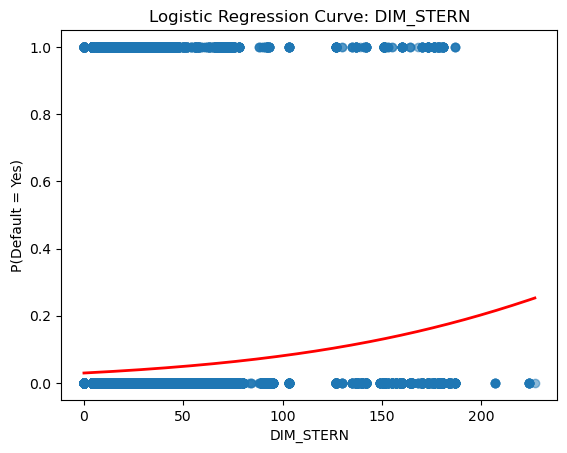

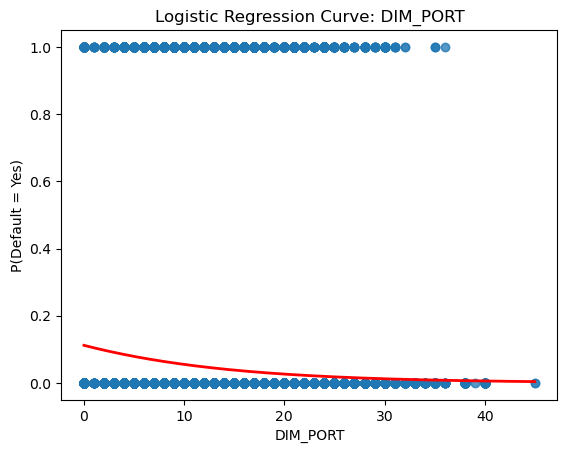

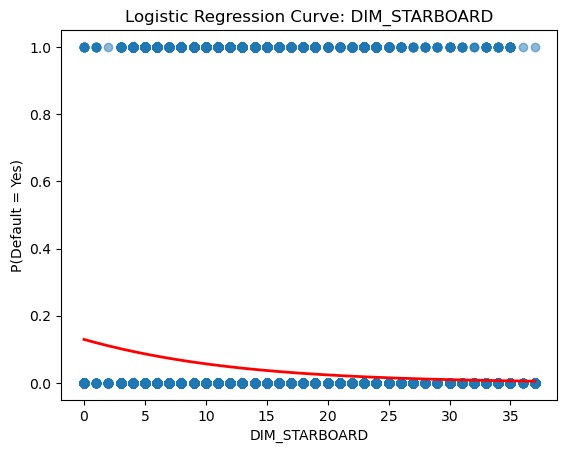

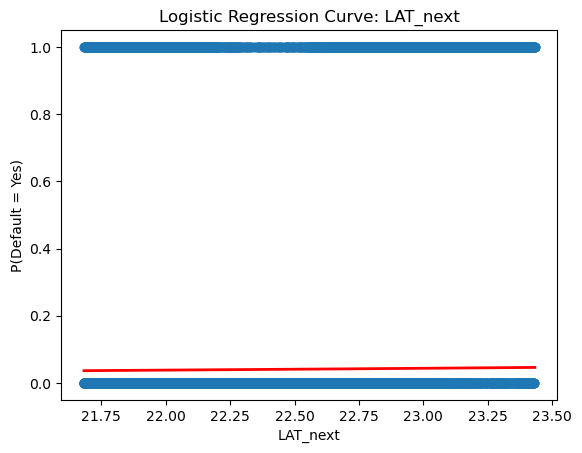

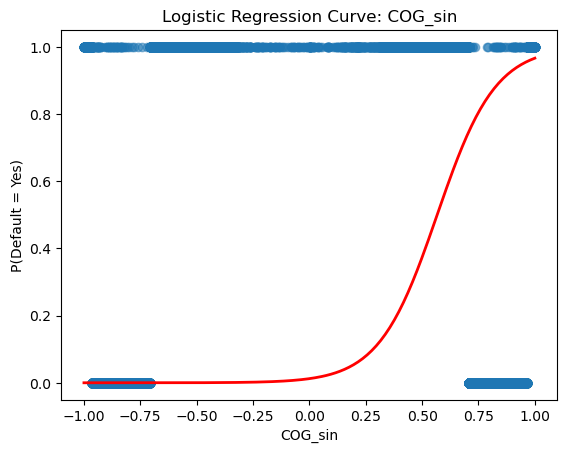

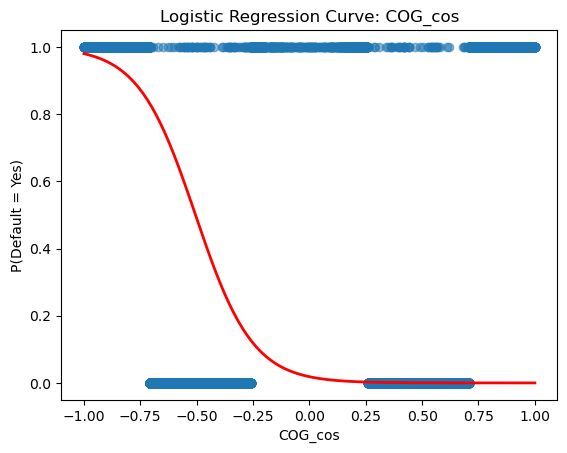

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Choose predictors
predictors = ['LAT_AVG','LON_AVG','SPEED_KNOTS','COG_DEG','HEADING_DEG','NAV_STATUS',
              'NAV_SENSOR','SHIP_AND_CARGO_TYPE','DRAUGHT','DRAUGHT.1','DIM_BOW','DIM_STERN',
             'DIM_PORT','DIM_STARBOARD','LAT_next','COG_sin','COG_cos']

for pred_var in predictors:
    # Create grid of values for this predictor
    x_vals = np.linspace(ais_data[pred_var].min(), ais_data[pred_var].max(), 200)
    
    # Create DataFrame with all predictors fixed at their mean
    X_plot_df = pd.DataFrame(np.tile(ais_data[allvars].mean().values, (200,1)), columns=allvars)
    
    # Replace the column we want to vary
    X_plot_df[pred_var] = x_vals
    
    # Transform using the design matrix
    X_plot = design.transform(X_plot_df)
    
    # Predict probabilities
    y_plot = results.predict(X_plot)
    
    # Plot
    plt.figure()
    plt.scatter(ais_data[pred_var], y, alpha=0.5)
    plt.plot(x_vals, y_plot, color='red', linewidth=2)
    plt.xlabel(pred_var)
    plt.ylabel("P(Default = Yes)")
    plt.title(f'Logistic Regression Curve: {pred_var}')
    plt.show()



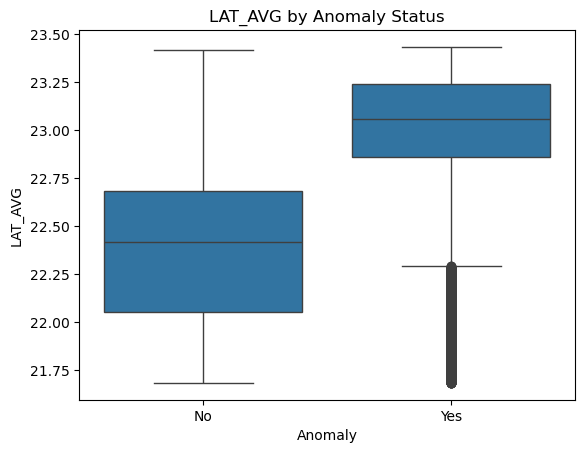

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Anomaly', y='LAT_AVG', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('LAT_AVG')
plt.title('LAT_AVG by Anomaly Status')
plt.show()


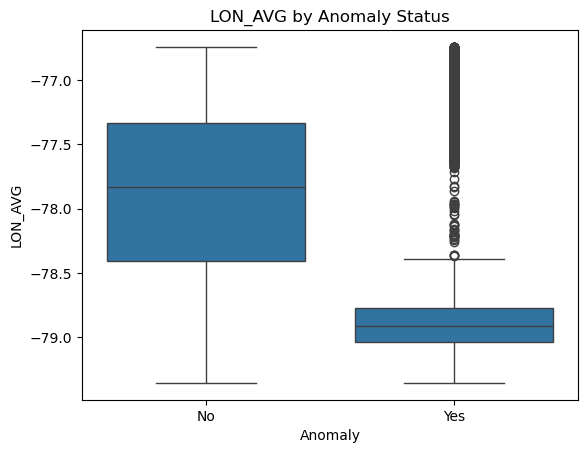

In [74]:
sns.boxplot(x='Anomaly', y='LON_AVG', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('LON_AVG')
plt.title('LON_AVG by Anomaly Status')
plt.show()

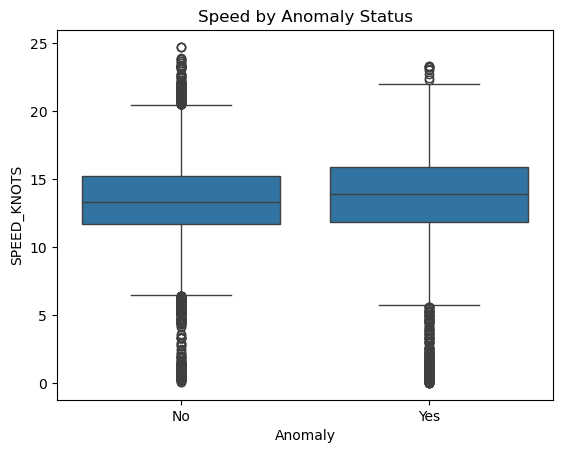

In [75]:
sns.boxplot(x='Anomaly', y='SPEED_KNOTS', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('SPEED_KNOTS')
plt.title('Speed by Anomaly Status')
plt.show()

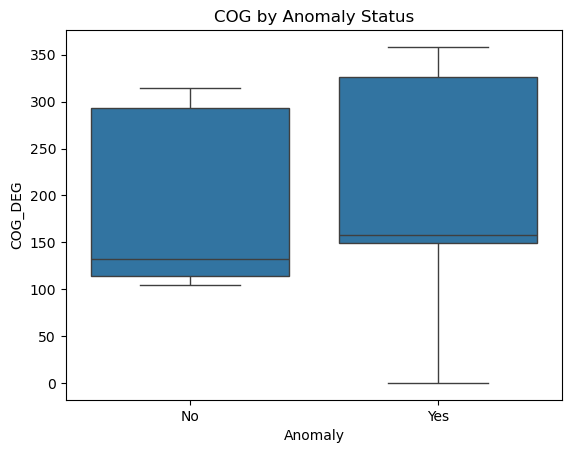

In [76]:
sns.boxplot(x='Anomaly', y='COG_DEG', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('COG_DEG')
plt.title('COG by Anomaly Status')
plt.show()

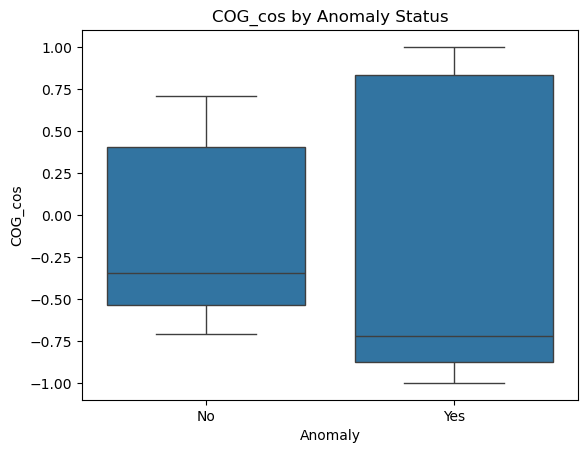

In [77]:
sns.boxplot(x='Anomaly', y='COG_cos', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('COG_cos')
plt.title('COG_cos by Anomaly Status')
plt.show()

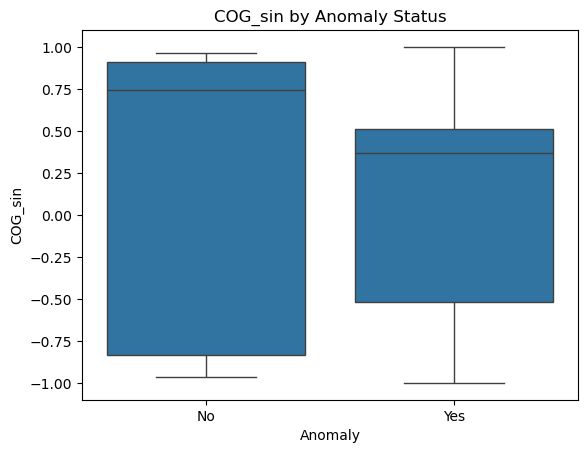

In [78]:
sns.boxplot(x='Anomaly', y='COG_sin', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('COG_sin')
plt.title('COG_sin by Anomaly Status')
plt.show()

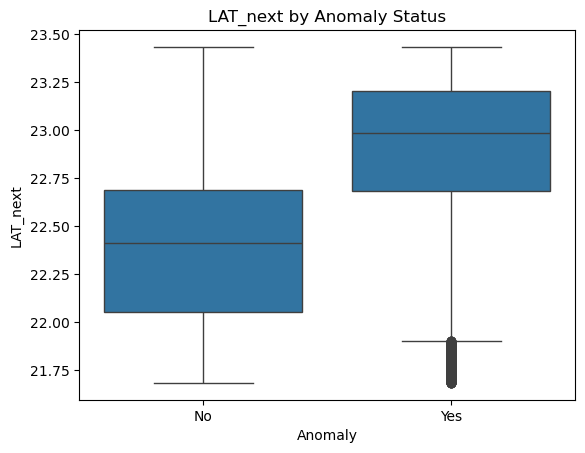

In [79]:
sns.boxplot(x='Anomaly', y='LAT_next', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('LAT_next')
plt.title('LAT_next by Anomaly Status')
plt.show()

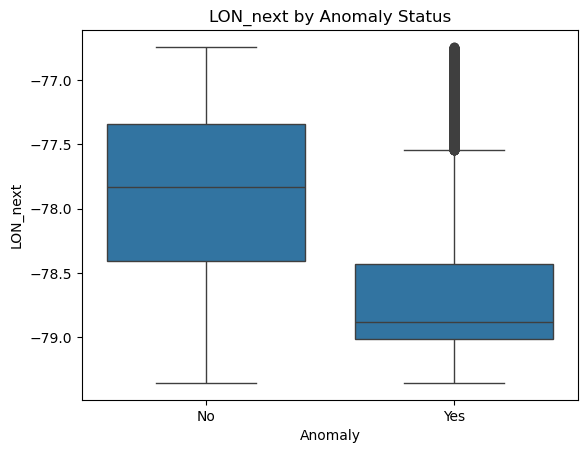

In [80]:
sns.boxplot(x='Anomaly', y='LON_next', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('LON_next')
plt.title('LON_next by Anomaly Status')
plt.show()

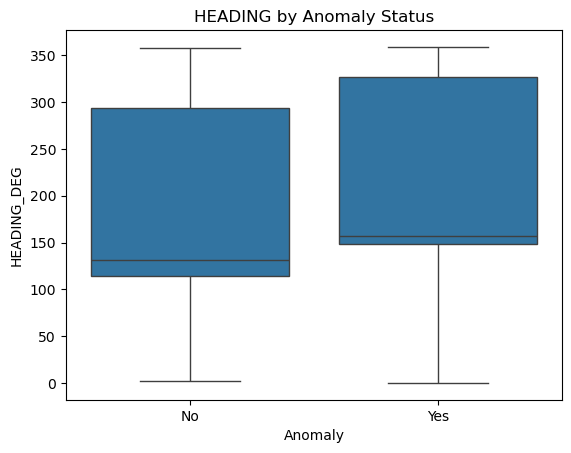

In [81]:
sns.boxplot(x='Anomaly', y='HEADING_DEG', data=ais_data)
plt.xlabel('Anomaly')
plt.ylabel('HEADING_DEG')
plt.title('HEADING by Anomaly Status')
plt.show()